In [1]:
from typing import Tuple
import numpy as np

def bisection(f,a,b,tol) -> Tuple[bool, float, int]:
    fa = f(a)
    fb = f(b)
    # failure when it won't converge
    if fa * fb > 0: return False, np.inf, 0
    # verify end points are not a root
    if fa == 0:     return True, a, 0
    if fb == 0:     return True, b, 0

    count = 0
    d = 0.5*(a+b)
    while abs(d - a) > tol:
        fd = f(d)
        if fd == 0:         return True, d, count
        if fa * fd < 0:     b = d
        else:               a = d; fa = fd
        d = 0.5*(a+b)
        count += 1
    return True, d, count

def newton_method(f,df,x0,tol,nmax,verb=False):

    #Initialize iterates and iterate list
    xn=x0
    rn=np.array([x0])
    # function evaluations
    fn=f(xn); dfn=df(xn)
    nfun=2 #evaluation counter nfun
    dtol=1e-10 #tolerance for derivative (being near 0)

    if abs(dfn)<dtol:
        #If derivative is too small, Newton will fail. Error message is
        #displayed and code terminates.
        if verb:
            print('derivative -> 0')# fprintf('\n derivative at initial guess is near 0, try different x0 \n')
        return
    else:
        n=0
        if verb:
            print("\n|--n--|----xn----|---|f(xn)|---|---|f'(xn)|---|")

        #Iteration runs until f(xn) is small enough or nmax iterations are computed.

        while n<=nmax:
            if verb:
                print("|--%d--|%1.8f|%1.8f|%1.8f|" %(n,xn,np.abs(fn),np.abs(dfn)))

            pn = - fn/dfn #Newton step
            if np.abs(pn)<tol or np.abs(fn)<2e-15:
                break

            #Update guess adding Newton step
            xn = xn + pn

            # Update info and loop
            n+=1
            rn=np.append(rn,xn)
            dfn=df(xn)
            fn=f(xn)
            nfun+=2

        r=xn

        # if n>=nmax:
        #     print("Newton method failed to converge, niter=%d, nfun=%d, f(r)=%1.1e\n'" %(n,nfun,np.abs(fn)))
        # else:
        #     print("Newton method converged succesfully, niter=%d, nfun=%d, f(r)=%1.1e" %(n,nfun,np.abs(fn)))

    return r,rn,n

# P1

In [2]:
import scipy
import matplotlib.pyplot as plt

Ti = 20
Ts = -15
alpha = 0.138e-6
epsilon = 1e-13

f = lambda _x: (Ti - Ts) * scipy.special.erf(_x/(2*np.sqrt(alpha * 5.184 * 10**6))) + Ts
df = lambda _x: (Ti - Ts) * (2/np.sqrt(np.pi)) * np.exp(-(_x*_x)/(alpha * 2.0736 * 10**7)) * (1/(2*np.sqrt(alpha * 5.184 * 10**6)))

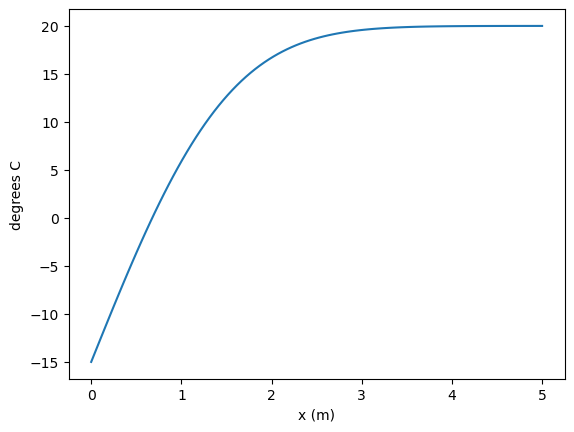

In [3]:
x = np.linspace(0, 5, 100)
y = f(x)

plt.plot(x,y)
plt.xlabel("x (m)")
plt.ylabel("degrees C")
plt.show()

In [4]:
bisection(f, 0, 5, epsilon)

(True, 0.6769618544819167, 45)

In [5]:
newton_method(f, df, 0.01, epsilon, 1000)

(np.float64(0.6769618544819365),
 array([0.01      , 0.64251787, 0.67669213, 0.67696184, 0.67696185]),
 4)

In [6]:
newton_method(f, df, 5, epsilon, 1000)

C:\Users\matth\AppData\Local\Temp\ipykernel_6484\1327096939.py:51: RuntimeWarning: divide by zero encountered in scalar divide
  pn = - fn/dfn #Newton step
C:\Users\matth\AppData\Local\Temp\ipykernel_6484\1327096939.py:56: RuntimeWarning: invalid value encountered in scalar add
  xn = xn + pn


(np.float64(nan),
 array([ 5.00000000e+00, -5.32818977e+03,             inf, ...,
                    nan,             nan,             nan], shape=(1002,)),
 1001)

# P4

In [70]:
def newton_modified(f,df,x0,tol,nmax,verb=False):

    #Initialize iterates and iterate list
    xn=x0
    rn=np.array([x0])
    # function evaluations
    fn=f(xn); dfn=df(xn)
    nfun=2 #evaluation counter nfun
    dtol=1e-10 #tolerance for derivative (being near 0)

    if abs(dfn)<dtol:
        #If derivative is too small, Newton will fail. Error message is
        #displayed and code terminates.
        if verb:
            print('derivative -> 0')# fprintf('\n derivative at initial guess is near 0, try different x0 \n')
        return
    else:
        n=0
        if verb:
            print("\n|--n--|----xn----|---|f(xn)|---|---|f'(xn)|---|")

        #Iteration runs until f(xn) is small enough or nmax iterations are computed.

        while n<=nmax:
            if verb:
                print("|--%d--|%1.8f|%1.8f|%1.8f|" %(n,xn,np.abs(fn),np.abs(dfn)))

            pn = - fn/dfn #Newton step
            if np.abs(pn)<tol or np.abs(fn)<2e-15:
                break

            #Update guess adding Newton step
            xn = xn + pn

            # Update info and loop
            n+=1
            rn=np.append(rn,xn)
            dfn=df(xn)
            fn=f(xn)
            nfun+=2

        r=xn

        # if n>=nmax:
        #     print("Newton method failed to converge, niter=%d, nfun=%d, f(r)=%1.1e\n'" %(n,nfun,np.abs(fn)))
        # else:
        #     print("Newton method converged succesfully, niter=%d, nfun=%d, f(r)=%1.1e" %(n,nfun,np.abs(fn)))

    return r,rn,n

def newton_2c(f,df,x0,tol,nmax,verb=False):

    #Initialize iterates and iterate list
    xn=x0
    rn=np.array([x0])
    # function evaluations
    fn=f(xn); dfn=df(xn)
    nfun=2 #evaluation counter nfun
    dtol=1e-10 #tolerance for derivative (being near 0)

    if abs(dfn)<dtol:
        #If derivative is too small, Newton will fail. Error message is
        #displayed and code terminates.
        if verb:
            print('derivative -> 0')# fprintf('\n derivative at initial guess is near 0, try different x0 \n')
        return
    else:
        n=0
        if verb:
            print("\n|--n--|----xn----|---|f(xn)|---|---|f'(xn)|---|")

        #Iteration runs until f(xn) is small enough or nmax iterations are computed.

        while n<=nmax:
            if verb:
                print("|--%d--|%1.8f|%1.8f|%1.8f|" %(n,xn,np.abs(fn),np.abs(dfn)))

            pn = -3 * fn/dfn #Newton step
            if np.abs(pn)<tol or np.abs(fn)<2e-15:
                break

            #Update guess adding Newton step
            xn = xn + pn

            # Update info and loop
            n+=1
            rn=np.append(rn,xn)
            dfn=df(xn)
            fn=f(xn)
            nfun+=2

        r=xn

        # if n>=nmax:
        #     print("Newton method failed to converge, niter=%d, nfun=%d, f(r)=%1.1e\n'" %(n,nfun,np.abs(fn)))
        # else:
        #     print("Newton method converged succesfully, niter=%d, nfun=%d, f(r)=%1.1e" %(n,nfun,np.abs(fn)))

    return r,rn,n

f = lambda _x: (np.exp(_x) - (3 * _x * _x))**3
df = lambda _x: 3*(np.exp(_x)-(3*_x*_x))**2*(np.exp(_x)-6*_x)

x = np.linspace(3, 4, 1000)
# plt.plot(x, f(x))
# plt.show()
new_r, new_iter, new_n = newton_method(f, df, 3.5, 1e-16, 1000)
new_p = np.log(np.abs(new_iter[-2] - new_r))/np.log(np.abs(new_iter[-3] - new_r))
print(f'Newton order of convergence: {new_p}, n={new_n}')

tf = lambda _x: (np.exp(_x)-3*_x**2)/(3*(np.exp(_x)-6))
dtf = lambda _x: (np.exp(_x)*(_x*_x-2*_x-2)+12*_x)/((np.exp(_x)-6)**2)
mod_r, mod_iter, mod_n = newton_modified(tf, dtf, 3.5, 1e-16, 1000)
mod_p = np.log(np.abs(mod_iter[-2] - mod_r))/np.log(np.abs(mod_iter[-3] - mod_r))
print(f'Modified order of convergence: {mod_p}, n={mod_n}')


two_r, two_iter, two_n = newton_2c(f, df, 3.5, 1e-16, 1000)
two_p = np.log(np.abs(two_iter[-2] - two_r))/np.log(np.abs(two_iter[-3] - two_r))
print(f'Newton 2c order of convergence: {two_p}, n={two_n}')



Newton order of convergence: 1.0647639205490025, n=31
Modified order of convergence: 2.1404285662110545, n=4
Newton 2c order of convergence: 2.015265233567675, n=4


# P5

In [7]:
def secant_method(f,x0,x1,tol,nmax,verb=False):
    #secant (quasi-newton) method to find root of f starting with guesses x0 and x1

    #Initialize iterates and iterate list
    xnm=x0; xn=x1;
    rn=np.array([x1]);
    # function evaluations
    fn=f(xn); fnm=f(xnm);
    msec = (fn-fnm)/(xn-xnm);
    nfun=2; #evaluation counter nfun
    dtol=1e-10; #tolerance for derivative (being near 0)

    if np.abs(msec)<dtol:
        #If slope of secant is too small, secant will fail. Error message is
        #displayed and code terminates.
        if verb:
            print('\n slope of secant at initial guess is near 0, try different x0,x1 \n');
    else:
        n=0;
        if verb:
            print("\n|--n--|----xn----|---|f(xn)|---|---|msec|---|");

        #Iteration runs until f(xn) is small enough or nmax iterations are computed.

        while n<=nmax:
            if verb:
                print("|--%d--|%1.8f|%1.8f|%1.8f|" %(n,xn,np.abs(fn),np.abs(msec)));

            pn = - fn/msec; #Secant step
            if np.abs(pn)<tol or np.abs(fn)<2e-15:
                break;

            #Update guess adding Newton step, update xn-1
            xnm = xn; #xn-1 is now xn
            xn = xn + pn; #xn is now xn+pn

            # Update info and loop
            n+=1;
            rn=np.append(rn,xn);
            fnm = fn; #Note we can re-use this function evaluation
            fn=f(xn); #So, only one extra evaluation is needed per iteration
            msec = (fn-fnm)/(xn-xnm); # New slope of secant line
            nfun+=1;

        r=xn;

        if n>=nmax:
            print("Secant method failed to converge, niter=%d, nfun=%d, f(r)=%1.1e\n'" %(n,nfun,np.abs(fn)));
        else:
            print("Secant method converged succesfully, niter=%d, nfun=%d, f(r)=%1.1e" %(n,nfun,np.abs(fn)));

    return (r,rn,n)

Secant method converged succesfully, niter=8, nfun=10, f(r)=1.6e-15
1.1347241384015194


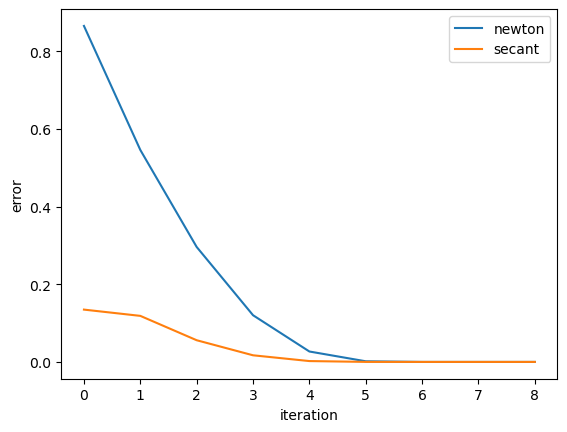

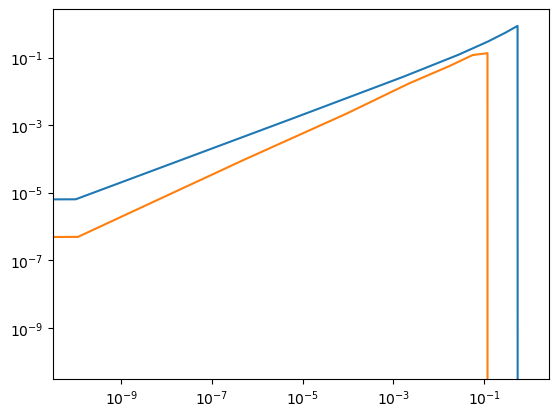

In [20]:
import matplotlib.pyplot as plt

f = lambda _x: _x**6 - _x - 1
df = lambda _x: 6*_x**5 - 1

n_r, n_xn, n_n = newton_method(f, df, 2, 1e-16, 1000)
s_r, s_xn, s_n = secant_method(f, 2, 1, 1e-16, 1000)
print(n_r)

plt.plot(range(n_n+1), np.abs(n_r - n_xn), label='newton')
plt.plot(range(s_n+1), np.abs(n_r - s_xn), label='secant')
plt.legend()
plt.xlabel('iteration')
plt.ylabel('error')
plt.show()

plt.loglog(np.abs(n_xn - n_r), np.abs(np.roll(n_xn, 1) - n_r))
plt.loglog(np.abs(s_xn - s_r), np.abs(np.roll(s_xn, 1) - s_r))
plt.show()